# Actividad 1

### El objetivo de esta actividad es importar una imagen y modificar sus parametros de luminancia y saturacion

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage  import color

In [2]:
def rgb2yiq(img):
    
    ## matrix de transformacion al espacio YIQ

    YIQ_matrix = np.array([[0.299,      0.587,        0.114],
                           [0.595716, -0.274453, -0.321263],
                           [0.211456, -0.522591, 0.311135]])
    
    y_max = img.shape[0]
    x_max = img.shape[1]

    ## Normalizamos los valores de cada pixel
    img_norm = img/255
    
    # reservo memoria
    img_yiq = np.zeros([y_max, x_max, 3])

    for px_y in range(0, y_max):
        for px_x in range(0, x_max):
            img_yiq[px_y, px_x, :] = np.dot( YIQ_matrix, img_norm[px_y , px_x ,:])
    return img_yiq


def yiq2rgb(img):
    
    ## matrix de transformacion al espacio YIQ

    YIQ_matrix = np.array([[0.299,      0.587,        0.114],
                           [0.595716, -0.274453, -0.321263],
                           [0.211456, -0.522591, 0.311135]])
    
    RGB_matrix = np.linalg.inv(YIQ_matrix)
    
    y_max = img.shape[0]
    x_max = img.shape[1]
    
    # reservo memoria
    img_rgb = np.zeros([y_max, x_max, 3])
    
    for px_y in range(0, y_max):
        for px_x in range(0, x_max):
            img_rgb[px_y, px_x, :] = np.dot( RGB_matrix, img[px_y , px_x ,:], )
    return img_rgb 

Text(0.5, 1.0, 'Imagen original')

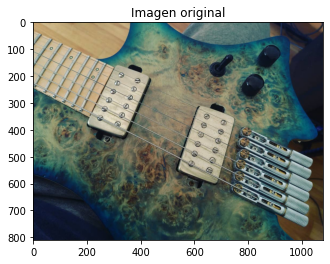

In [3]:
## hay que tener cuidado porque open cv lee la imagen como BGR y Matplotlib como RGB

imagen_A = plt.imread("imagenes/guitarra.jpg")
plt.imshow(imagen_A)
plt.title('Imagen original')

In [4]:
## Me fijo que tamaño tiene la imagen

In [5]:
imagen_A.shape


(810, 1080, 3)

In [6]:
imagen_A.dtype

dtype('uint8')

## Imprimo las componentes R G B por separado

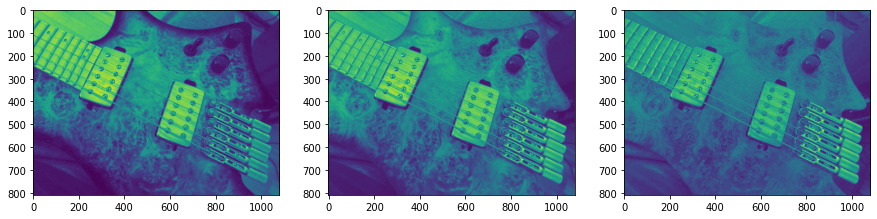

In [7]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(imagen_A[:,:,0])
axarr[1].imshow(imagen_A[:,:,1])
axarr[2].imshow(imagen_A[:,:,2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


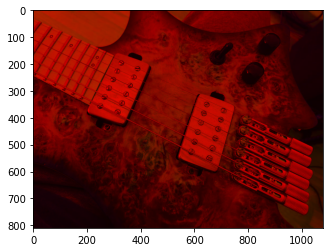

In [8]:
## transformo la imagen al esquema yiq

imagen_yiq = rgb2yiq(imagen_A) 

## Muestro la imagen transformada resultante
plt.imshow(imagen_yiq)

In [ ]:
# convierto a RGB mediante mi funcion de yiq2rgb para ver si da bien

plt.imshow(yiq2rgb(imagen_yiq))    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
### defino mis constantes alfa y beta y modifico la luminancia y saturacion de mi imagen

alfa_1 = 0.5
alfa_2 = 1.8
beta_1 = 0.7
beta_2 = 1.2

imagen_yiq[:,:,0] = alfa_2 * imagen_yiq[:,:,0]
imagen_yiq[:,:,1] = beta_2 * imagen_yiq[:,:,1]
imagen_yiq[:,:,2] = beta_2 * imagen_yiq[:,:,2]



### Valido que todo este dentro de los rangos admitidos



In [ ]:
for vect in imagen_yiq[:,:,0]:
    for px in vect:
        if px > 1: px = 1

for vect in imagen_yiq[:,:,1]:
    for px in vect:
        if (px > 0.5957):
            px = 0.5957
        else:
            if(px < -0.5957):
                px = -0.5957

for vect in imagen_yiq[:,:,2]:
    for px in vect:
        if (px > 0.5226):
            px = 0.5226
        else:
            if(px < -0.5226):
                px = -0.5226

In [ ]:

_, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(yiq2rgb(imagen_yiq))
axarr[1].imshow(imagen_A)